### Übung 06 - NDFT

Die nicht-uniforme diskrete Fouriertransformation ist eine Möglichkeit zur Rekonstruktion von Daten mit beliebigen Trajektorien. Allerdings birgt sie große Probleme


In [28]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from helper import *

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

## Aufgabe 1 - Die Trajektorie

Um nicht-uniforme k-Raum Daten zu rekonstruieren, benötigt man zunächst die Trajektorie. Hier werden wir eine radiale Trajektorie verwenden. Schreiben Sie eine Funktion, die als Eingabe eine Anzahl an Samples pro Spoke und eine Anzahl Spokes bekommt. Ein Spoke ist eine k-Raum-Linie. Diese Funktion soll dann die Trajektorie in Form von $k_x$- und $k_y$-Koordinaten zurückgeben. Die Spokes sollen immer um den Golden Angle gedreht werden.

Bei 256 Samples pro Readout sollte z.B. der erste Spoke in 1-er Schritten von $k_x = -128$ bist $k_x = 127$ gehen. $k_y$ ist dabei 0.

In [25]:
def compute_spokes(n_samples_per_spoke, n_spokes):
    golden_angle = 2 * np.pi * (-111.25) / 360
    angles = np.arange(n_spokes) * golden_angle % (2 * np.pi)
    kx_ranges = np.array([-128 * np.cos(angles), 127 * np.cos(angles)])
    ky_ranges = np.array([-128 * np.sin(angles), 127 * np.sin(angles)])
    x_values = np.reshape(np.linspace(kx_ranges[0,:], kx_ranges[1,:], num=n_samples_per_spoke), (1, n_samples_per_spoke * n_spokes), order='F')
    y_values = np.reshape(np.linspace(ky_ranges[0,:], ky_ranges[1,:], num=n_samples_per_spoke), (1, n_samples_per_spoke * n_spokes), order='F')
    return np.concatenate((x_values, y_values), axis=0)

print(compute_spokes(256, 2))

[[-128.         -127.         -126.         ...  -45.30475479
   -45.66719282  -46.02963086]
 [   0.            0.            0.         ... -116.50098366
  -117.43299153 -118.3649994 ]]


Rufen Sie die von Ihnen geschriebene Funktion mit 10 Spokes und 256 Samples pro Spoke auf und visualisieren Sie die Trajektorie.
Dafür können Sie zum Beispiel die Funktion `pyplot.plot` verwenden.

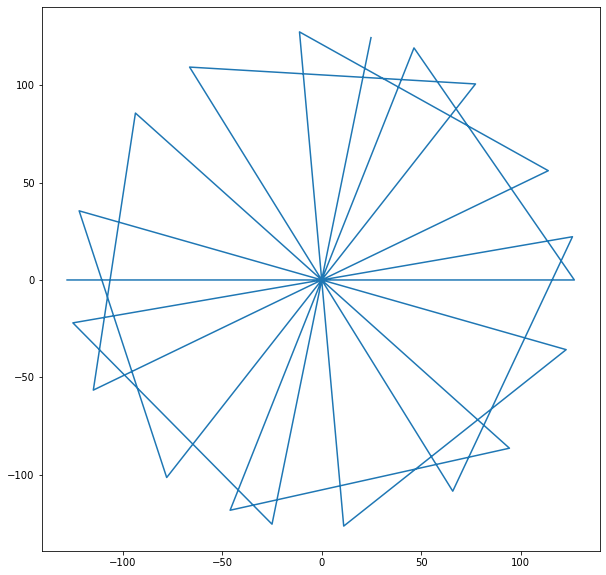

In [26]:
traj = compute_spokes(256, 10)
plt.plot(traj[0,:], traj[1,:])

Wie unterscheidet sich die Dichte der gesampleten Punkte im k-Raum gegenüber dem kartesischen Sampling? Was könnte das für Konsequenzen haben?

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

## Aufgabe 2 - Die NDFT

Laden Sie die Dateien `phantom_radial_32.npy`, `phantom_radial_64.npy`, `phantom_radial_128.npy` und `phantom_radial_256.npy` aus Stud.IP herunter. Platzieren Sie diese im selben Ordner, wie dieses Notebook und führen Sie dann die folgende Code-Zeile aus.

In [27]:
kspace32 = np.load('phantom_radial_32.npy')
kspace64 = np.load('phantom_radial_64.npy')
kspace128 = np.load('phantom_radial_128.npy')
kspace256 = np.load('phantom_radial_256.npy')

Die eingelesenen Daten sind radial gesampled und mit dem Golden Angle gedreht. Visualisieren Sie zunächst den `kspace256` (als wäre es ein reguläres 2D-Bild) mit logarithmischer Skala.

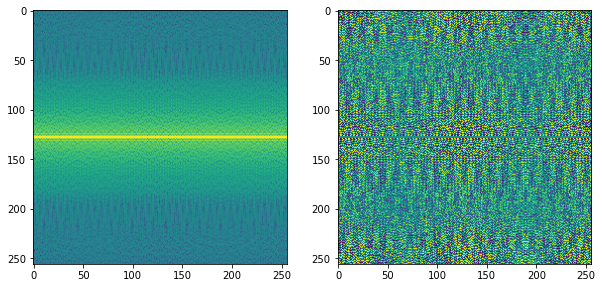

In [29]:
visualize_single_kspace(kspace256)

Welche der beiden Dimensionen gibt die Spokes und welche die Readouts pro Spoke an? Begründen Sie Ihre Antwort.

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

* x-Achse: Anzahl der Spokes
* y-Achse: Anzahl der Readouts pro Spoke
* mittlere Zeile sieht wie k-Raum Mitte aus
    * Alle Spokes erfassen die k-Raum Mitte also ist mittlere Zeile die gemessene k-Raum Mitte aller Spokes
    * Jede Zeile enthält die gemessenen Werte aller Spokes, wobei die entsprechende Zeile der entsprechende Abstand zur k-Raum Mitte ist
    * Demnach sind die Spalten die Messwerte eines Spokes

Rekonstruieren Sie nun zunächst den `kspace32` mit der iNDFT und stellen Sie es dar. Es handelt sich hier um das gleiche Phantom, wie in den vorherigen Aufgaben. Die Bilder sind nur teilweise niedriger aufgelöst.
Tipp: Sie müssen mithilfe der Funktion aus Aufgabe 1 erst einmal eine Trajektorie berechnen.

Schreiben Sie nun eine Funktion, die die iNDFT für beliebige Eingabegrößen berechnet, indem die k-Raum Daten und die Trajektorie übergeben wird. Die Berechnung sollte ohne for-Schleifen laufen, also nur mit numpy-Funktionen auskommen.

Wenden Sie nun Ihre Funktion nacheinander auf alle zu Anfang dieser Aufgabe eingelesenen k-Raum Daten an und stellen Sie das Ergebnis dar. Messen Sie dabei die Zeit, die die Rekonstruktion benötigt.

Wie skaliert die Laufzeit Ihrer Funktion in Abhängigkeit von der Eingabelänge (O-Notation)? Ist diese Art der Bildrekonstruktion praxistauglich?

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

Die rekonstruierten Bilder sollten recht verwaschen aussehen. Woran könnte das liegen?
Tipp: Schauen Sie noch einmal auf die Visualisierung der Trajektorie in Aufgabe 1

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

Überlegen Sie sich eine Möglichkeit, um das Problem mit den verwaschenen Bildern zu lösen und implementieren Sie diese.